In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

river_thames = pd.read_csv('10-11_London_Bridge.txt') 
river_thames

,Date and time,water level (m ODN),flag,HW=1 or LW=0
0,01/05/1911 15:40:00,3.7130,1,NaN
1,02/05/1911 11:25:00,-2.9415,0,NaN
2,02/05/1911 16:05:00,3.3828,1,NaN
3,03/05/1911 11:50:00,-2.6367,0,NaN
4,03/05/1911 16:55:00,2.9256,1,NaN
...,...,...,...,...
115498,30/12/1995 20:44:00,3.2900,1,NaN
115499,31/12/1995 02:32:00,-1.6000,0,NaN
115500,31/12/1995 08:59:00,3.2000,1,NaN
115501,31/12/1995 15:03:00,-1.8000,0,NaN


In [3]:
# confirming that the last column is indeed empty 
river_thames.describe()

,flag,HW=1 or LW=0
count,115503.000000,0.0
mean,0.501433,NaN
std,0.500000,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,1.000000,NaN
75%,1.000000,NaN
max,1.000000,NaN


In [4]:
# creating a new DataFrame which takes only the first three columns 
new_df = river_thames[river_thames.columns[0:3]]

# renaming as datatime, water_level, is_high_tide
new_df.columns = ['datetime', 'water_level', 'is_high_tide']
new_df

,datetime,water_level,is_high_tide
0,01/05/1911 15:40:00,3.7130,1
1,02/05/1911 11:25:00,-2.9415,0
2,02/05/1911 16:05:00,3.3828,1
3,03/05/1911 11:50:00,-2.6367,0
4,03/05/1911 16:55:00,2.9256,1
...,...,...,...
115498,30/12/1995 20:44:00,3.2900,1
115499,31/12/1995 02:32:00,-1.6000,0
115500,31/12/1995 08:59:00,3.2000,1
115501,31/12/1995 15:03:00,-1.8000,0


In [5]:
# Converting to datetime
new_df['datetime'] = pd.to_datetime(new_df['datetime'], errors='coerce')  # Add errors='coerce' to handle invalid date values by converting them to NaT

# Converting to float
new_df['water_level'] = pd.to_numeric(new_df['water_level'], errors='coerce')  # Use pd.to_numeric to handle non-numeric values by converting them to NaN

# Create extra columns: month, year
new_df['month'] = new_df['datetime'].dt.month
new_df['year'] = new_df['datetime'].dt.year

new_df 


C:\Users\hp\AppData\Local\Temp\ipykernel_19356\950511281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['datetime'] = pd.to_datetime(new_df['datetime'], errors='coerce')  # Add errors='coerce' to handle invalid date values by converting them to NaT
C:\Users\hp\AppData\Local\Temp\ipykernel_19356\950511281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['water_level'] = pd.to_numeric(new_df['water_level'], errors='coerce')  # Use pd.to_numeric to handle non-numeric values by converting 

,datetime,water_level,is_high_tide,month,year
0,1911-01-05 15:40:00,3.7130,1,1,1911
1,1911-02-05 11:25:00,-2.9415,0,2,1911
2,1911-02-05 16:05:00,3.3828,1,2,1911
3,1911-03-05 11:50:00,-2.6367,0,3,1911
4,1911-03-05 16:55:00,2.9256,1,3,1911
...,...,...,...,...,...
115498,1995-12-30 20:44:00,3.2900,1,12,1995
115499,1995-12-31 02:32:00,-1.6000,0,12,1995
115500,1995-12-31 08:59:00,3.2000,1,12,1995
115501,1995-12-31 15:03:00,-1.8000,0,12,1995


In [6]:
def clean_data(data):
    # using first 3 columns
    data = data[data.columns[0:3]]
    
    # renaming columns
    data.columns = ['datetime', 'water_level', 'is_high_tide']
    
    # converting 'datetime' to 'datetime' format
    data['datetime'] = pd.to_datetime(data['datetime']) 
    
    # convert 'water_level' to float format
    data['water_level'] = data['water_level'].astype(float)
    
    # create extra columns: month, year for easy access
    data['month'] = data['datetime'].dt.month
    data['year'] = data['datetime'].dt.year
    
    return data
clean_data(new_df) 

C:\Users\hp\AppData\Local\Temp\ipykernel_19356\1072564163.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data['datetime'])
C:\Users\hp\AppData\Local\Temp\ipykernel_19356\1072564163.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['water_level'] = data['water_level'].astype(float)
C:\Users\hp\AppData\Local\Temp\ipykernel_19356\1072564163.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,datetime,water_level,is_high_tide,month,year
0,1911-01-05 15:40:00,3.7130,1,1,1911
1,1911-02-05 11:25:00,-2.9415,0,2,1911
2,1911-02-05 16:05:00,3.3828,1,2,1911
3,1911-03-05 11:50:00,-2.6367,0,3,1911
4,1911-03-05 16:55:00,2.9256,1,3,1911
...,...,...,...,...,...
115498,1995-12-30 20:44:00,3.2900,1,12,1995
115499,1995-12-31 02:32:00,-1.6000,0,12,1995
115500,1995-12-31 08:59:00,3.2000,1,12,1995
115501,1995-12-31 15:03:00,-1.8000,0,12,1995


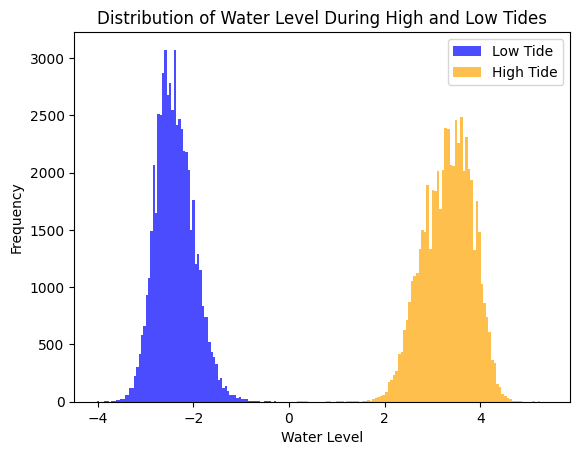

In [7]:
# Creating a histogram of new_df where is_high_tide = 0
plt.hist(new_df.query('is_high_tide==0')['water_level'], bins=100, alpha=0.7, label='Low Tide', color='blue')

# Creating a histogram of new_df where is_high_tide = 1
plt.hist(new_df.query('is_high_tide==1')['water_level'], bins=100, alpha=0.7, label='High Tide', color='orange')

# Adding labels and title
plt.xlabel('Water Level')
plt.ylabel('Frequency')
plt.title('Distribution of Water Level During High and Low Tides')

plt.legend()
plt.show()


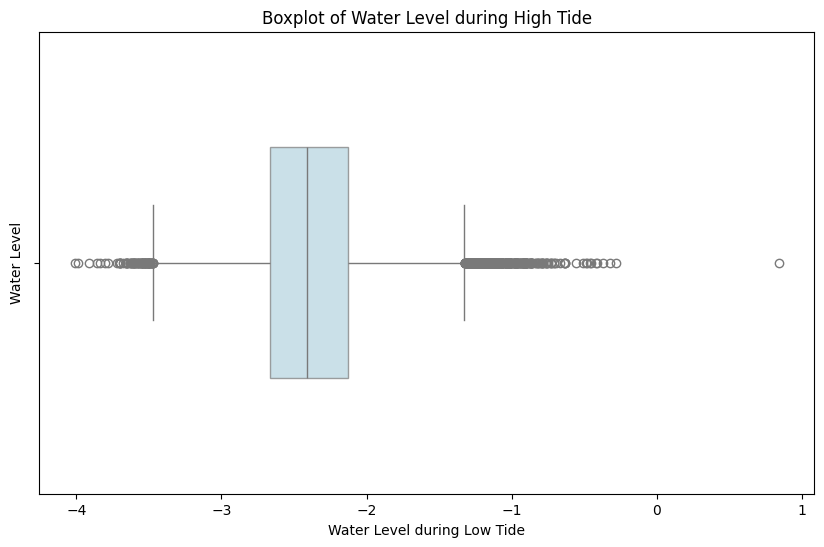

In [35]:
# Using boxplots to give a sense of min, max, range, and outliers of the data
plt.figure(figsize=(10, 6))

# Adjusting box width, color, and style
sns.boxplot(data=new_df.query('is_high_tide==0'), x='water_level', color='lightblue', width=0.5, boxprops=dict(alpha=0.7))

# Adding labels and title
plt.xlabel('Water Level during Low Tide')
plt.ylabel('Water Level')
plt.title('Boxplot of Water Level during High Tide')

plt.show()


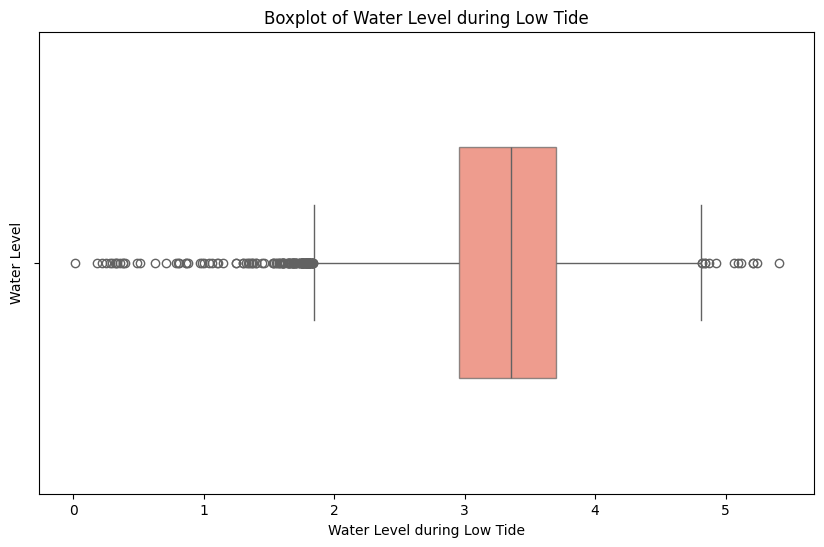

In [9]:
# Using boxplots to give a sense of min, max, range, and outliers of the data
plt.figure(figsize=(10, 6))

# Adjusting box width, color, and style
sns.boxplot(data=new_df.query('is_high_tide==1'), x='water_level', color='Tomato', width=0.5, boxprops=dict(alpha=0.7))

# Adding labels and title
plt.xlabel('Water Level during Low Tide')
plt.ylabel('Water Level')
plt.title('Boxplot of Water Level during Low Tide')

plt.show()


In [10]:
# futher analysis
new_df.query('(is_high_tide==1)').describe()

,water_level,is_high_tide,month,year
count,57909.000000,57917.0,57917.000000,57917.000000
mean,3.318373,1.0,6.534126,1953.701400
std,0.509422,0.0,3.441167,24.334694
min,0.010000,1.0,1.000000,1911.000000
25%,2.956400,1.0,4.000000,1933.000000
50%,3.352600,1.0,7.000000,1954.000000
75%,3.700000,1.0,10.000000,1975.000000
max,5.409900,1.0,12.000000,1995.000000


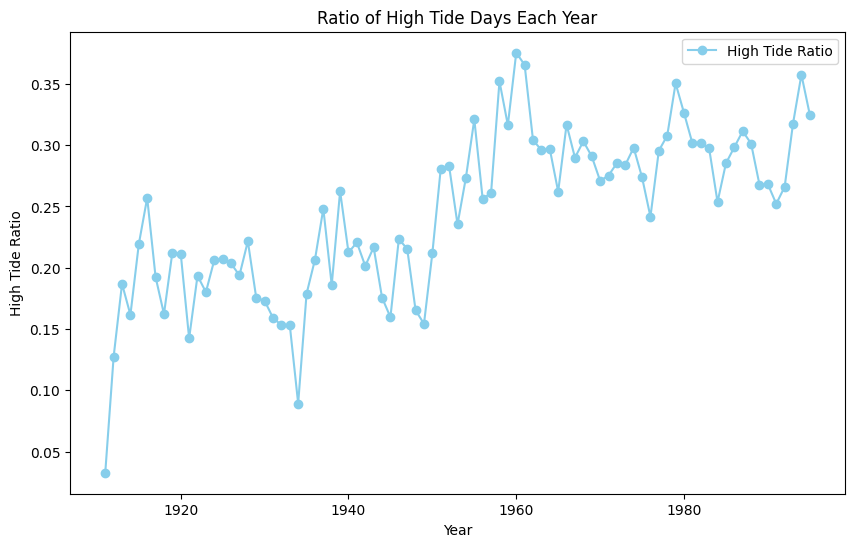

In [11]:
# plotting the ratio of high tide days for each year
plt.figure(figsize=(10, 6))

# Calculating the ratio
all_days = new_df.query('is_high_tide==1').groupby('year').count()['water_level']
high_days = new_df.query('(water_level>3.7) & (is_high_tide==1)').groupby('year').count()['water_level']
ratio = (high_days / all_days).reset_index()

plt.plot(ratio.year, ratio.water_level, marker='o', color='skyblue', label='High Tide Ratio')

plt.xlabel('Year')
plt.ylabel('High Tide Ratio')
plt.title('Ratio of High Tide Days Each Year')

plt.legend()
plt.show()


In [12]:
# summarizing water_level where is_high_tide==0
# counting number of days of low tide per year in new_df
# counting number of days of low tide where water level was below the 25th percentile in new_df

new_df.query('(is_high_tide==0)').describe()

,water_level,is_high_tide,month,year
count,57580.000000,57586.0,57586.000000,57586.000000
mean,-2.383737,0.0,6.532491,1953.671708
std,0.399748,0.0,3.444258,24.366551
min,-4.013000,0.0,1.000000,1911.000000
25%,-2.666900,0.0,4.000000,1933.000000
50%,-2.412900,0.0,7.000000,1954.000000
75%,-2.128700,0.0,10.000000,1975.000000
max,0.842900,0.0,12.000000,1995.000000


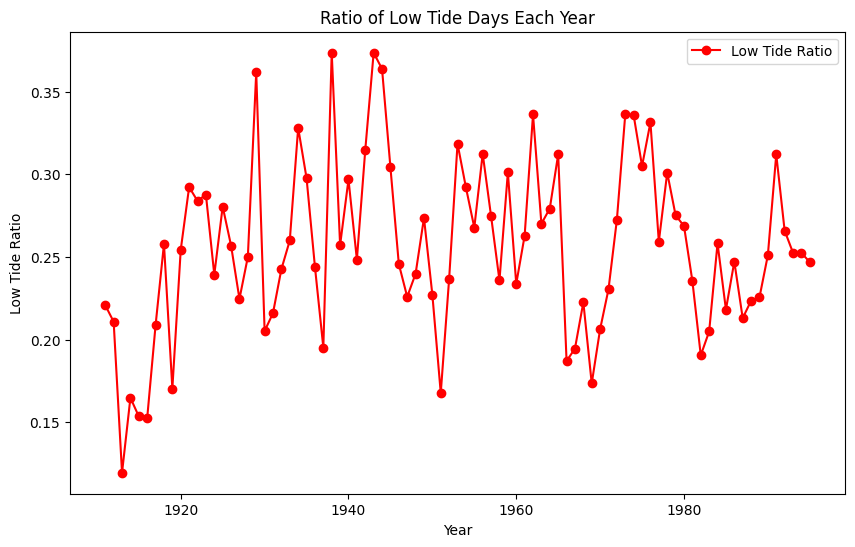

In [13]:
plt.figure(figsize=(10, 6))

# Calculate the ratio
all_days = new_df.query('is_high_tide==0').groupby('year').count()['water_level']
high_days = new_df.query('(water_level<-2.66) & (is_high_tide==0)').groupby('year').count()['water_level']
ratio = (high_days / all_days).reset_index()

# plotting the ratio of low tide days for each year
plt.plot(ratio.year, ratio.water_level, marker='o', color='red', label='Low Tide Ratio')

plt.xlabel('Year')
plt.ylabel('Low Tide Ratio')
plt.title('Ratio of Low Tide Days Each Year')

plt.legend()
plt.show()


In [14]:
# assessing monthly trends in water levels for 1927, 1928 and 1929
# looping through 1927, 1928, 1929
water_level = pd.DataFrame()

for year in [1927, 1928, 1929]:
    level_per_year = new_df.query(f'year=={year}').set_index('datetime')
    level_per_year = level_per_year.groupby('is_high_tide').resample('1M').median()['water_level'].reset_index()
    level_per_year['month'] = level_per_year.datetime.dt.month
    level_per_year['year'] = level_per_year.datetime.dt.year
    water_level = pd.concat([water_level, level_per_year]).reset_index(drop=True)

water_level[water_level['is_high_tide']==0].describe()


,is_high_tide,water_level,month,year
count,36.0,36.000000,36.00000,36.000000
mean,0.0,-2.447082,6.50000,1928.000000
std,0.0,0.095536,3.50102,0.828079
min,0.0,-2.611300,1.00000,1927.000000
25%,0.0,-2.509700,3.75000,1927.000000
50%,0.0,-2.462075,6.50000,1928.000000
75%,0.0,-2.382700,9.25000,1929.000000
max,0.0,-2.141400,12.00000,1929.000000


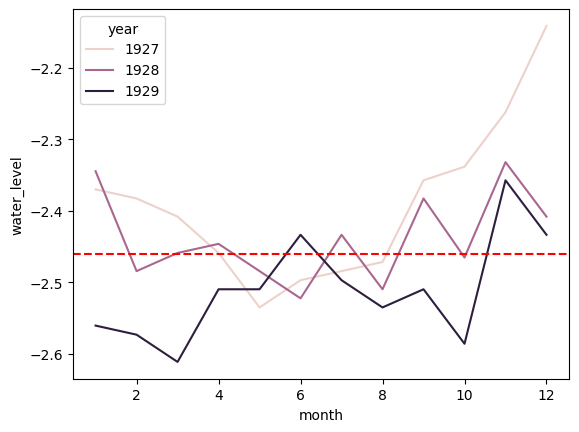

In [16]:
# plotting the high tide data for selected months indicating median of high tide in the months

sns.lineplot(data=water_level[water_level['is_high_tide']==0], y='water_level', x='month', hue='year')
plt.axhline(-2.46,0,12,linestyle='--',color='red')
plt.show()

In [17]:
water_level[water_level['is_high_tide']==1].describe()

,is_high_tide,water_level,month,year
count,36.0,36.000000,36.00000,36.000000
mean,1.0,3.266560,6.50000,1928.000000
std,0.0,0.104571,3.50102,0.828079
min,1.0,3.039900,1.00000,1927.000000
25%,1.0,3.209763,3.75000,1927.000000
50%,1.0,3.249450,6.50000,1928.000000
75%,1.0,3.324063,9.25000,1929.000000
max,1.0,3.459000,12.00000,1929.000000


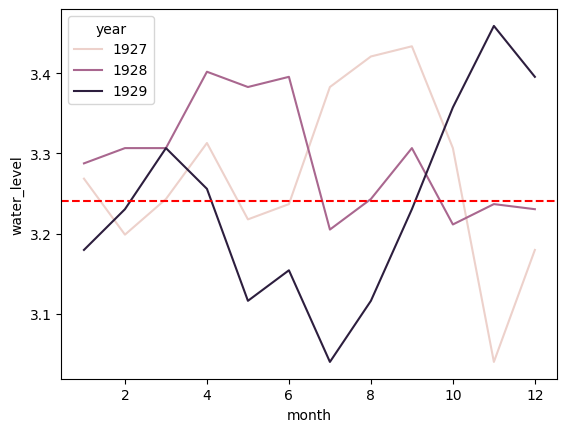

In [19]:
# plotting the low tide data for selected months indicating median of low tide in the months

sns.lineplot(data=water_level[water_level['is_high_tide']==1],y='water_level',x='month',hue='year')
plt.axhline(3.24,0,12,linestyle='--',color='red')
plt.show()

In [20]:
#beginning a forecasting model for London Bridge: a taste of autocorrelation

new_df1 = new_df.query('(year==1928) & (month<=6)').reset_index()

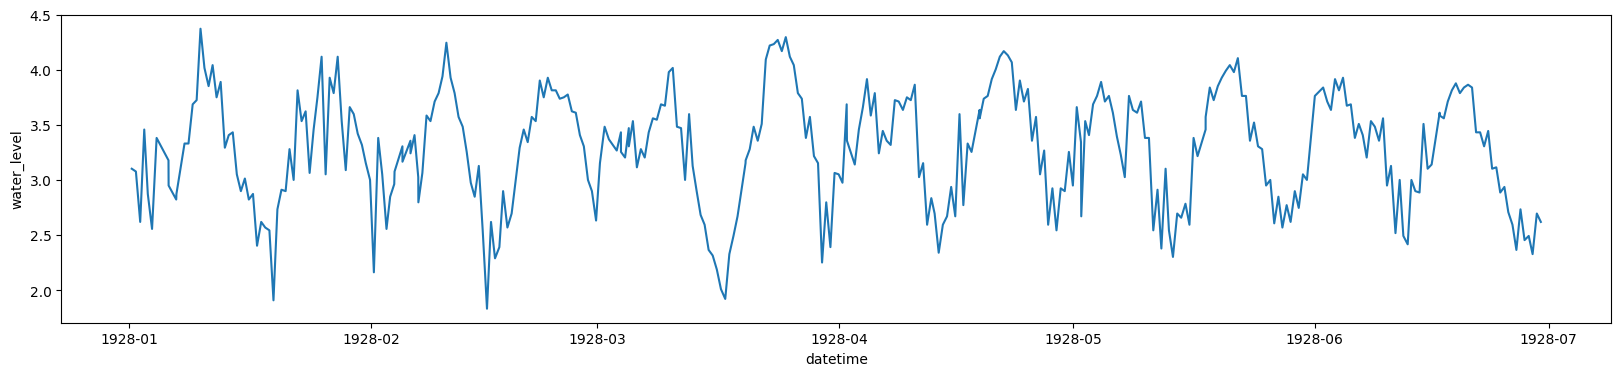

In [21]:
# plotting the high tide data for new_df1

fig, ax = plt.subplots(figsize=(20,4))
sns.lineplot(data=new_df1.query('is_high_tide==1'),x='datetime',y='water_level',ax=ax)
plt.show()

In [34]:
# Define the autocorr function (make sure it's defined correctly)
def autocorr(data, level='1D', flag=0):
    high_low = {0: 'high', 1: 'low'}
    level_dict = {'1D': 'daily', '15D': 'biweekly', '1M': 'monthly', '1Y': 'annual'}

    # Assuming 'is_high_tide', 'datetime', and 'water_level' columns exist in your dataset
    data = data[data['is_high_tide'] == flag].set_index('datetime').resample(level).mean()['water_level']

    # Check if there is sufficient data for autocorrelation calculation
    if len(data) < 2:
        print("Insufficient data for autocorrelation calculation.")
        return

    diff = data.diff()
    autocorrelation = diff.autocorr()

    print(f"The autocorrelation of {level_dict[level]} {high_low[flag]} values is {autocorrelation}")

# List of parameter combinations
param_combinations = [('1Y', 1), ('1Y', 0), ('1M', 1), ('1M', 0), ('15D', 1), ('15D', 0), ('1D', 1), ('1D', 0)]

# Calls to the autocorr function using a loop
for level, flag in param_combinations:
    autocorr(new_df, level=level, flag=flag) 



The autocorrelation of annual low values is -0.18996969606280925
The autocorrelation of annual high values is -0.2267745029585333
The autocorrelation of monthly low values is -0.26692706583747133
The autocorrelation of monthly high values is -0.23309650579274202
The autocorrelation of biweekly low values is -0.7843928882781158
The autocorrelation of biweekly high values is -0.7190836138958733
The autocorrelation of daily low values is 0.007192525193878769
The autocorrelation of daily high values is -0.12839673801304555
